# FORECAST


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
 
from statsmodels.tsa.stattools import adfuller    
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


In [2]:
dataset = pd.read_csv('data\\[1h]BTCUSDT.csv')

dataset.head()

,Start,Stop,Open,Close,Low,High,Volume
0,1502942400000,1502945999999,4261.48,4308.83,4261.32,4313.62,47.181009
1,1502946000000,1502949599999,4308.83,4315.32,4291.37,4328.69,23.234916
2,1502949600000,1502953199999,4330.29,4324.35,4309.37,4345.45,7.229691
3,1502953200000,1502956799999,4316.62,4349.99,4287.41,4349.99,4.443249
4,1502956800000,1502960399999,4333.32,4360.69,4333.32,4377.85,0.972807


# Visualize the time series


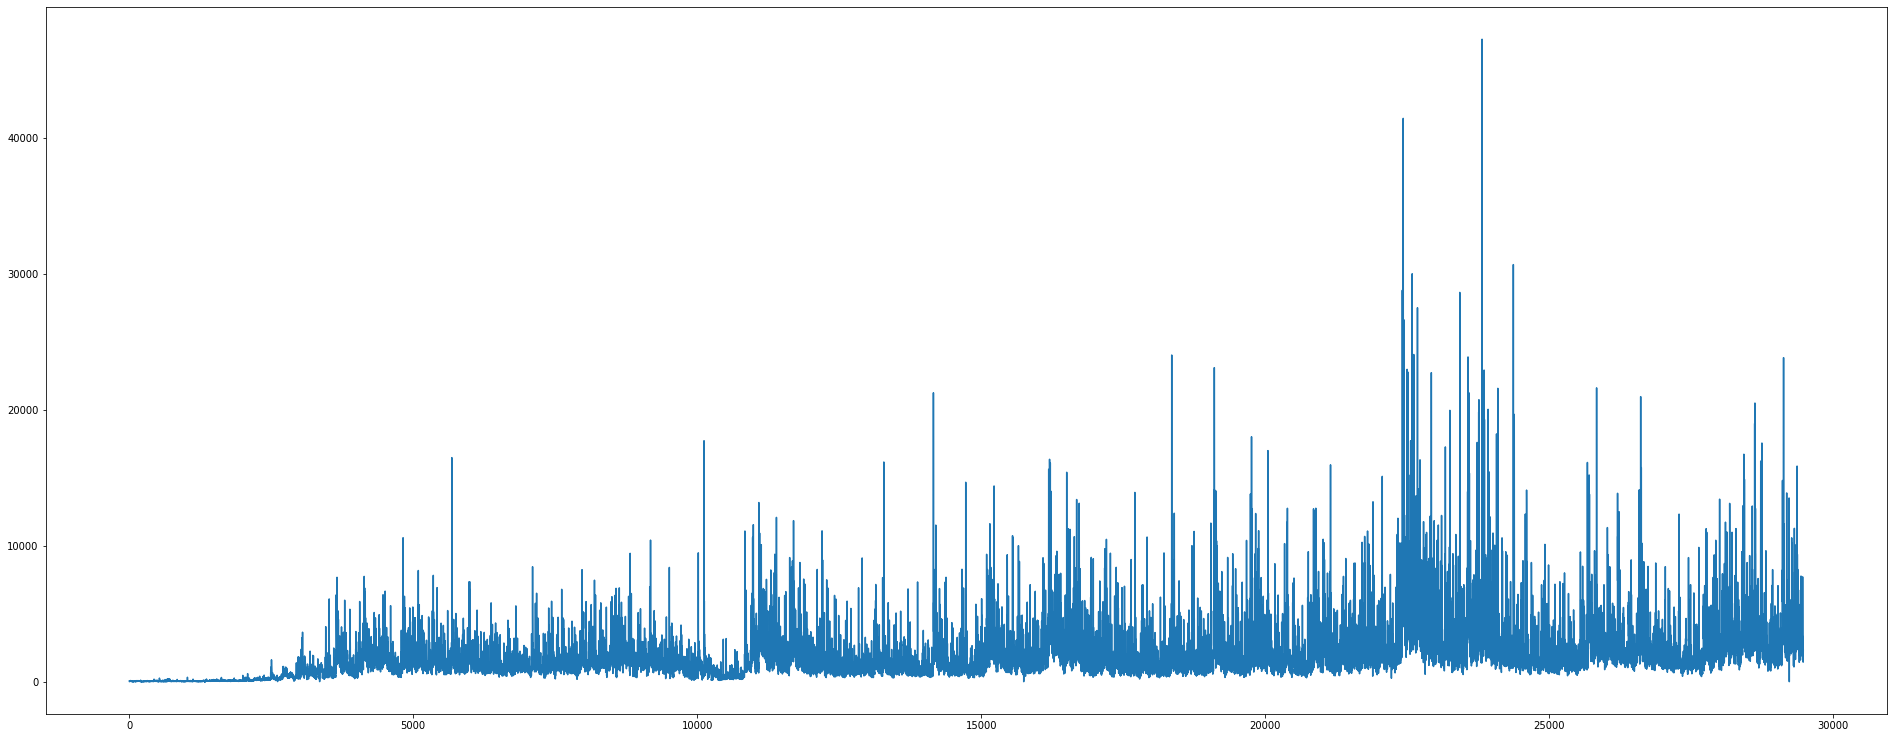

In [3]:
plt.figure(figsize=(33, 13))
plt.plot(dataset.Volume)

# Stationarize the time series 

In [4]:
test = adfuller(dataset.Volume.values)
print("ADF Statistic: {0}".format(test[0]))
print("p-value: {0}".format(test[1]))

if test[0] < test[4]["5%"]:
    print ("\nStationary")
else:
    print ("\nNon-Stationary")

ADF Statistic: -10.38005113475236
p-value: 2.1507828724790095e-18

Stationary


# Plot ACF/PACF charts and find optimal parameters

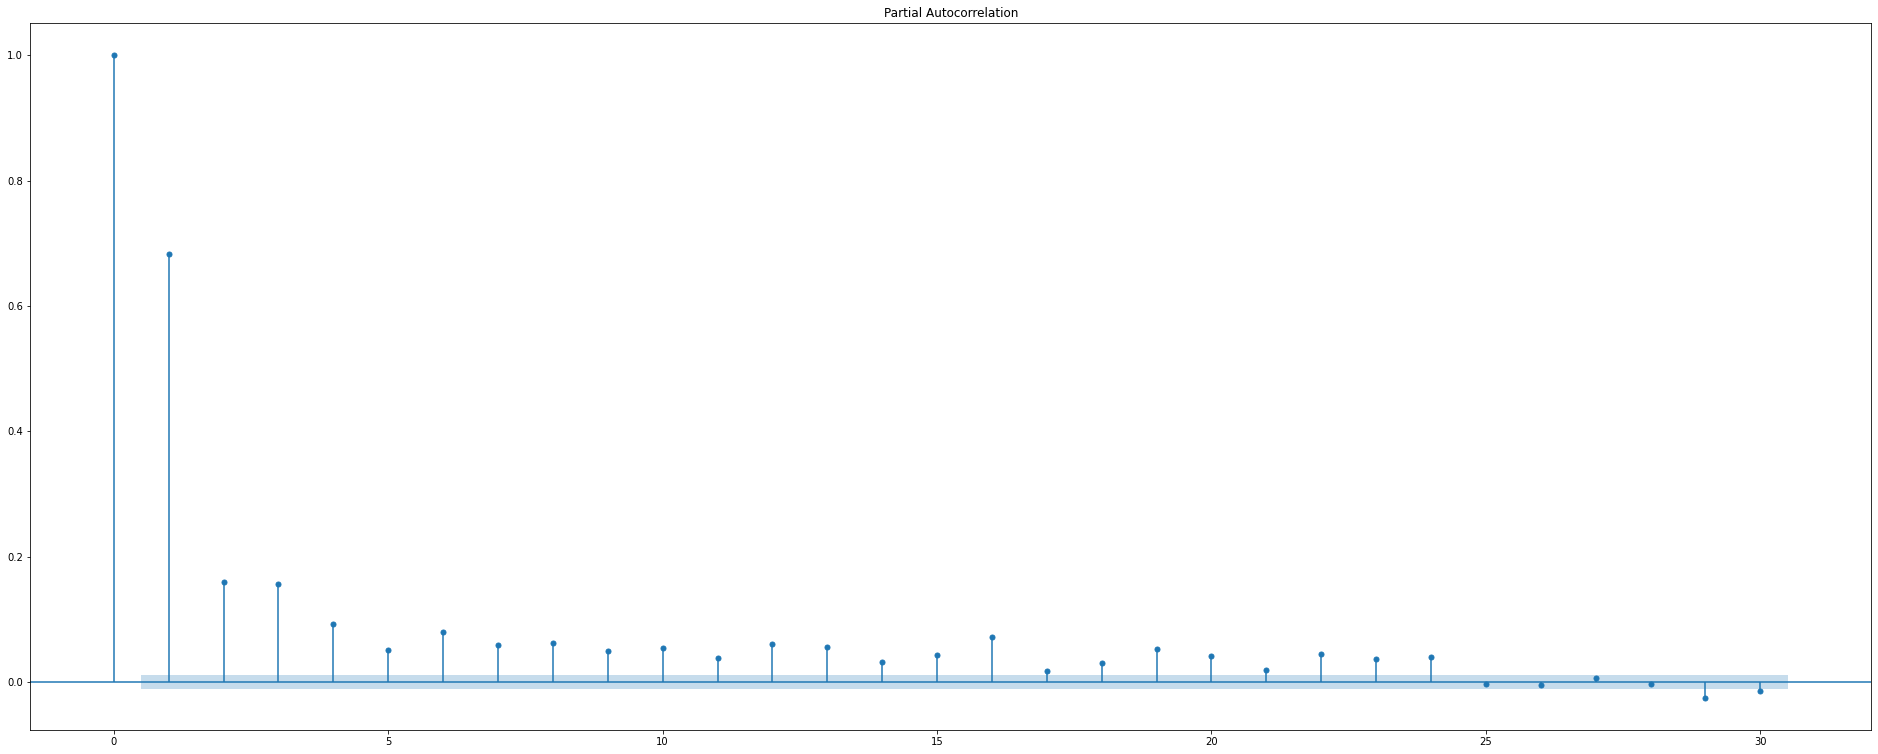

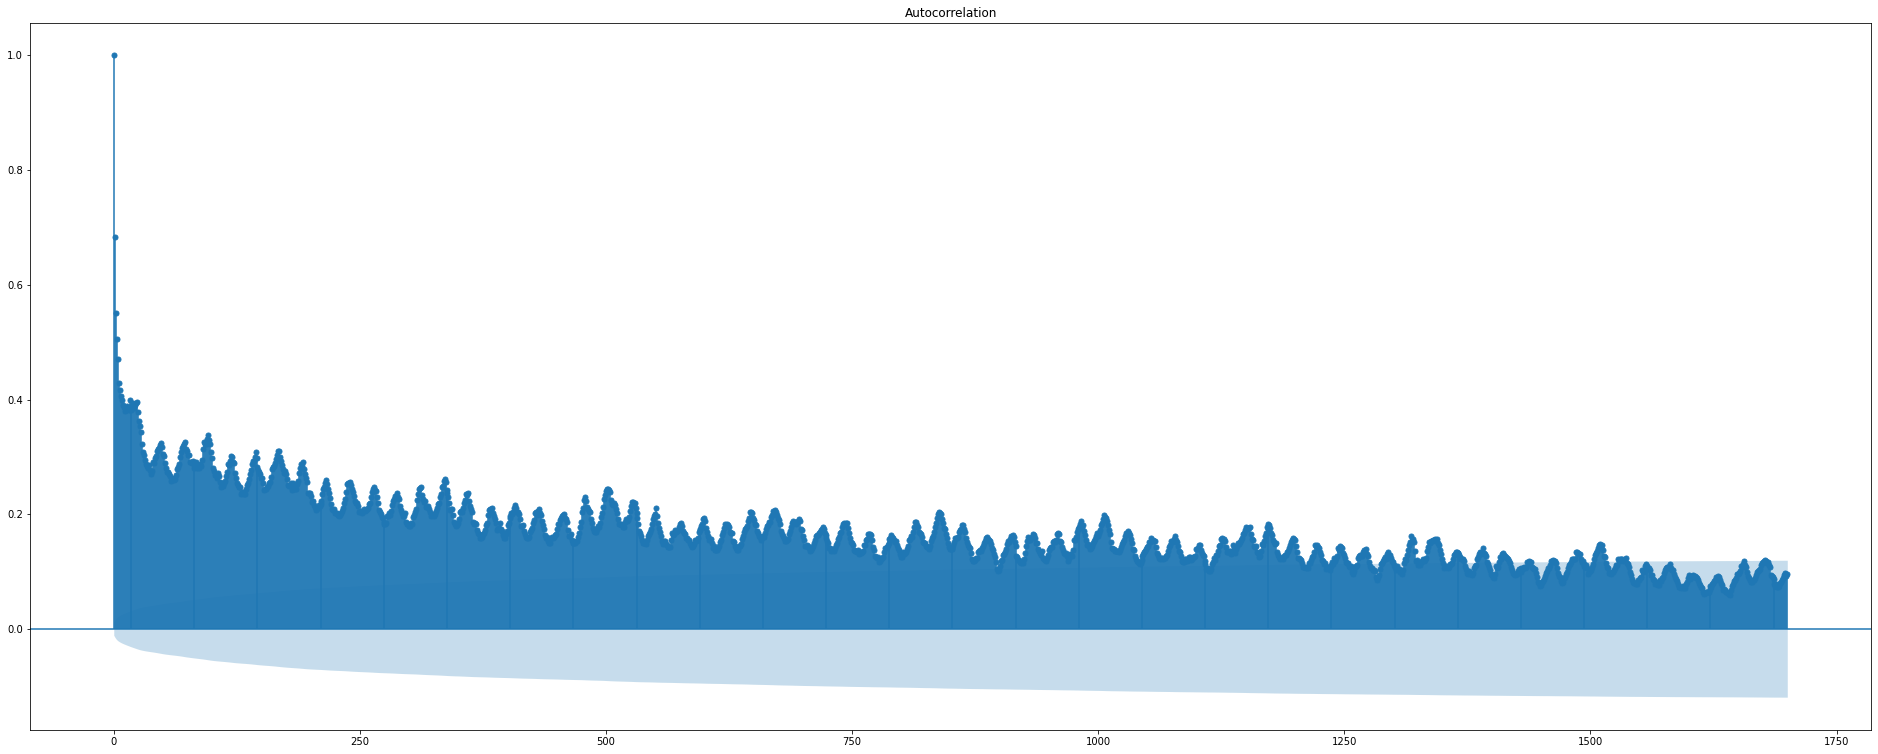

In [5]:
plt.rc("figure", figsize=(33, 13))
plot_pacf(dataset.Volume, lags=30)
plt.show()

plt.rc("figure", figsize=(33, 13))
plot_acf(dataset.Volume, lags=1700)
plt.show()

# Autoregression (AR)

In [6]:
model = AutoReg(dataset.Volume, lags=25, old_names=False)
model_fit = model.fit()
yhat1 = model_fit.predict(0, len(dataset.Volume)+1500)

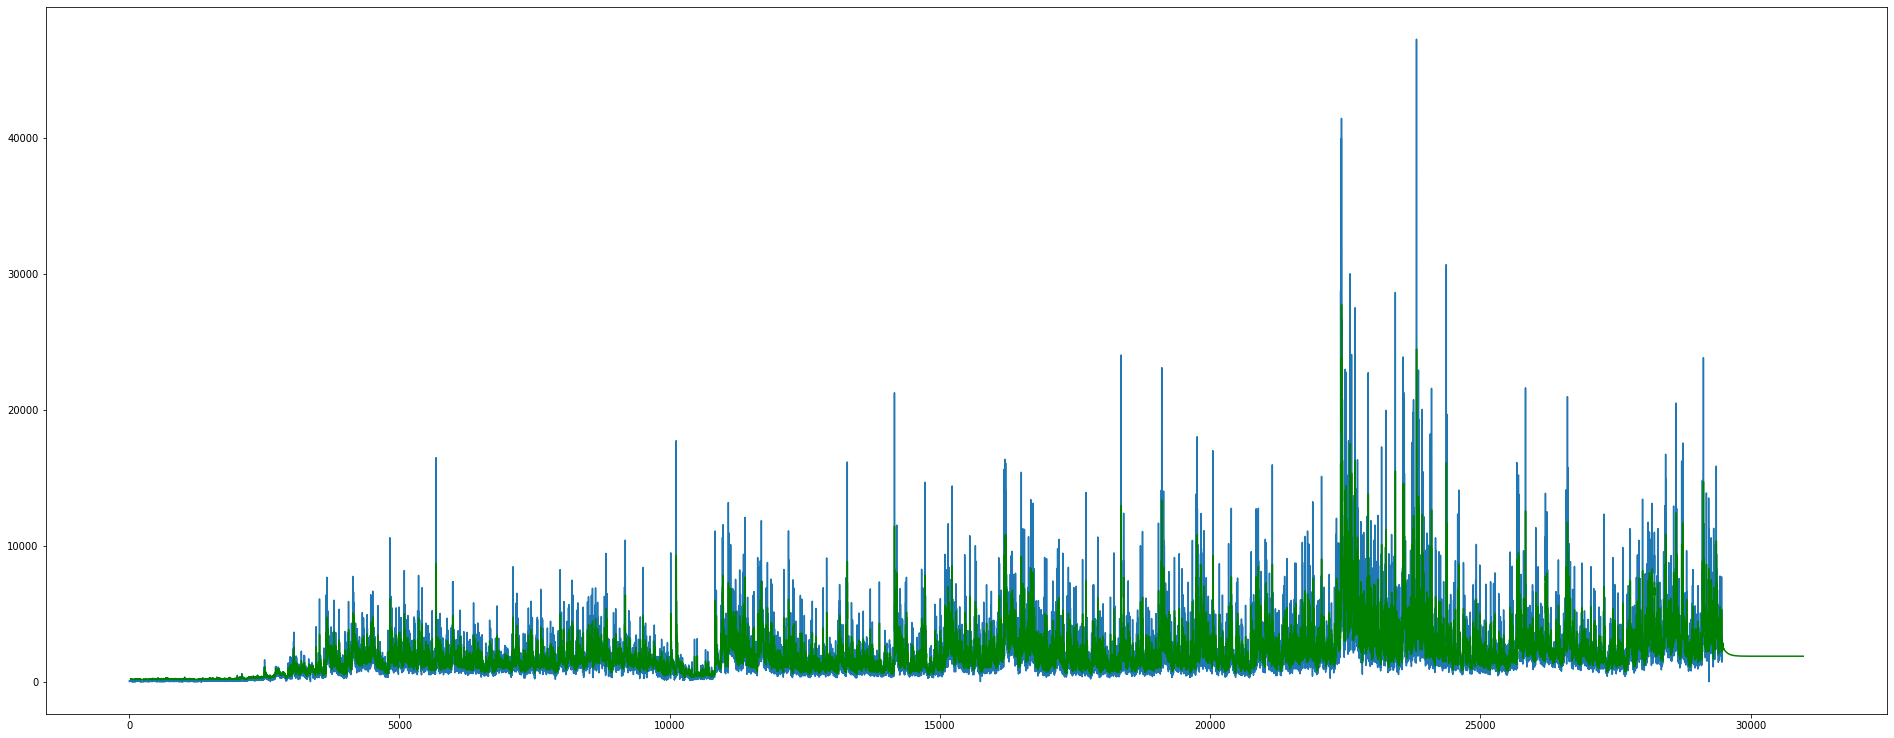

In [7]:
plt.figure(figsize=(33, 13))
plt.plot(dataset.Volume)
plt.plot(yhat1, 'green')

# Moving Average (MA)

In [8]:
model = ARIMA(dataset.Volume, order=(0, 0, 5))
model_fit = model.fit()
yhat2 = model_fit.predict(0, len(dataset.Volume)+1500)

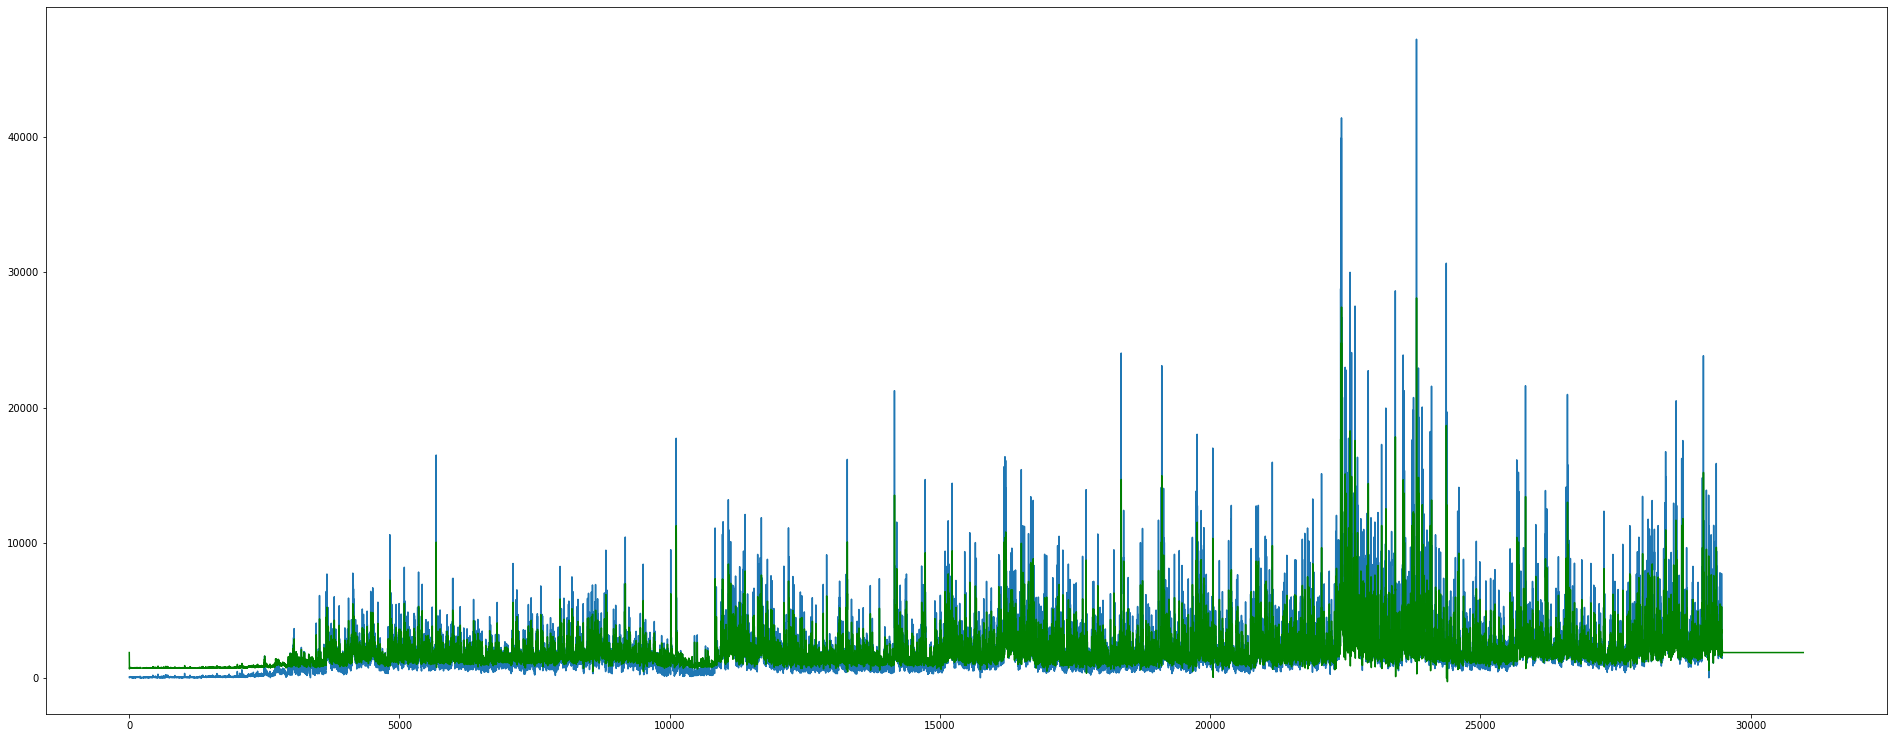

In [9]:
plt.figure(figsize=(33, 13))
plt.plot(dataset.Volume)
plt.plot(yhat2, 'green')

# Simple Exponential Smoothing (SES)

In [12]:
model = SimpleExpSmoothing(dataset.Volume, initialization_method=None)
model_fit = model.fit()
yhat3 = model_fit.predict(0, len(dataset.Volume)+1500)

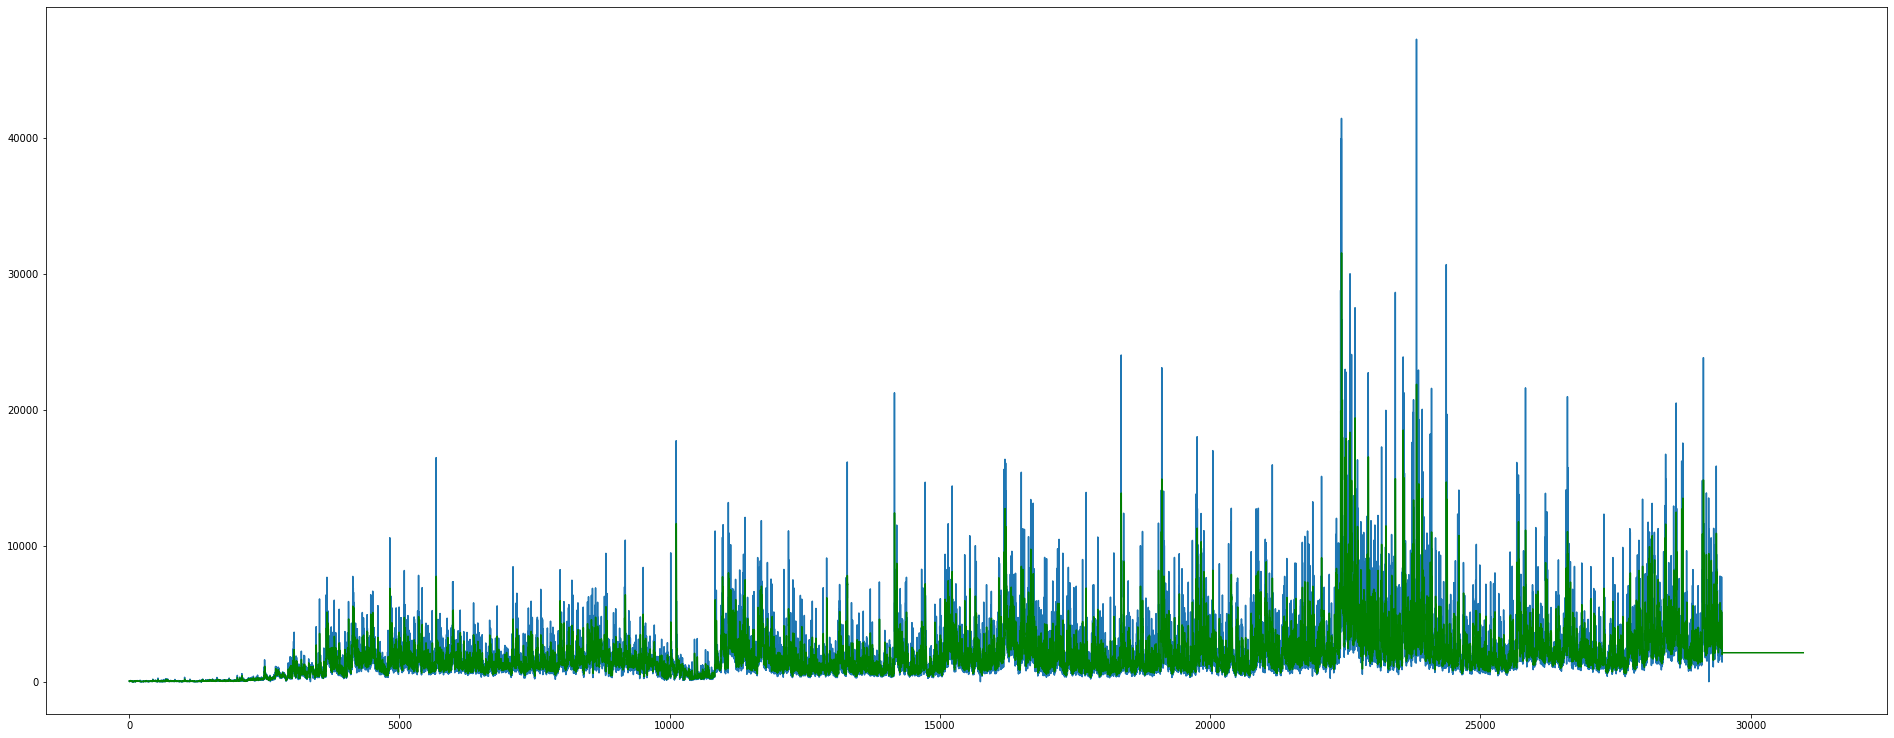

In [13]:
plt.figure(figsize=(33, 13))
plt.plot(dataset.Volume)
plt.plot(yhat3, 'green')

# Holt Winter’s Exponential Smoothing (HWES)

In [14]:
model = ExponentialSmoothing(dataset.Volume)
model_fit = model.fit()
yhat4 = model_fit.predict(0, len(dataset.Volume)+1500)

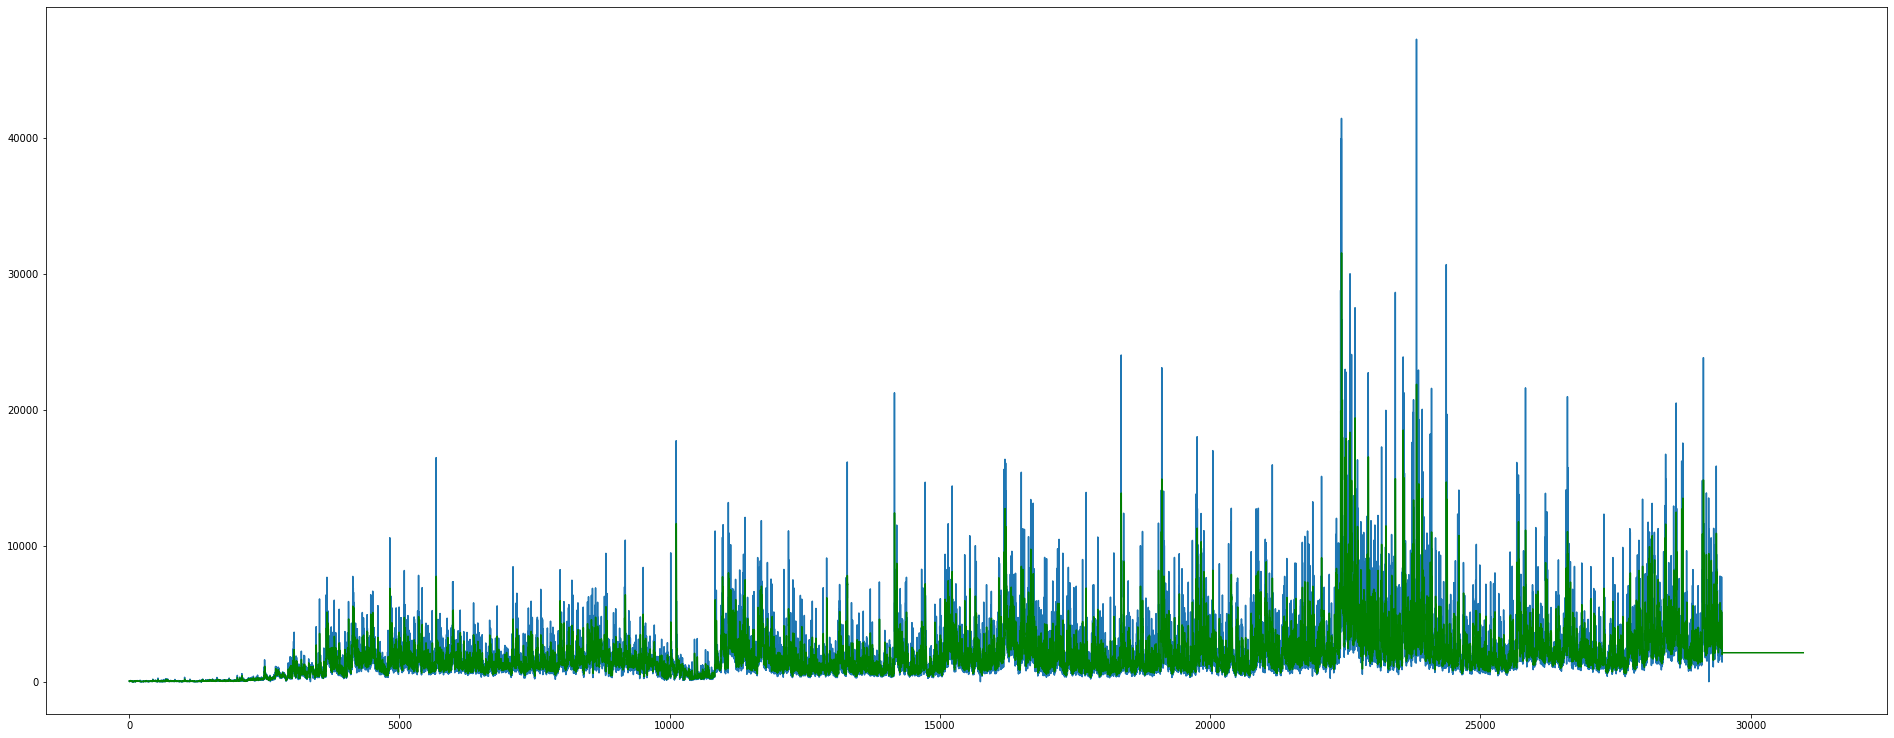

In [15]:
plt.figure(figsize=(33, 13))
plt.plot(dataset.Volume)
plt.plot(yhat4, 'green')